-----
##### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

## 1 import libs and data generation for training

In [121]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

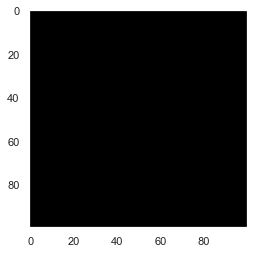

In [122]:
img = np.zeros((100, 100, 3), np.uint8)
plt.imshow(img)

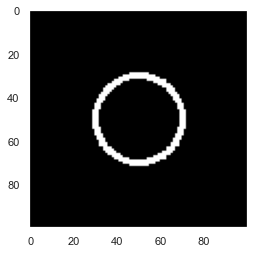

In [123]:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
imgCircle = cv2.circle(img, (50, 50), 20, (255, 255, 255), 2)
plt.imshow(imgCircle)


In [124]:
filename = 'data/imgTest/savedImage.jpg'
cv2.imwrite(filename, imgCircle)
  

True

## 2 Circle, Rectangle, data generation for training

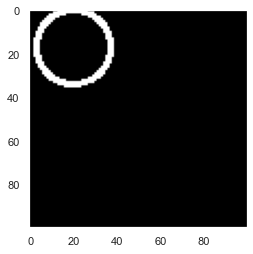

In [125]:
import random as rnd

path = 'data/img/'

observation = 1000

width = 100
height = 100


for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    r = rnd.randrange(5, ((width * 0.5) + (height * 0.5)) * 0.5 )

    if (x - r < 0):
        r = x
    if (y - r < 0):
        r = y

    if (x + r > width):
        r = width - x
    if (y + r > height):
        r = height - y


    imgCircle = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
    plt.imshow(imgCircle)
    filename = path + 'circle_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgCircle)

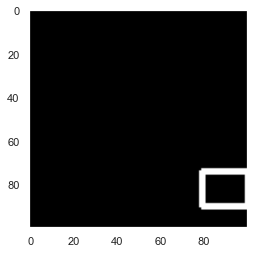

In [126]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    rectWidth = rnd.randrange(0, width)
    rectHeight = rnd.randrange(0, height)

    if (x + rectWidth > width):
        rectWidth = width - x
    if (y + rectHeight > height):
        rectHeight = height - y

    imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    plt.imshow(imgRect)
    filename = path + 'rect_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgRect)



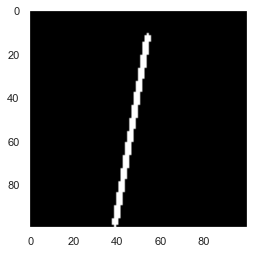

In [127]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x0 = rnd.randrange(0, width)
    y0 = rnd.randrange(0, height)

    x1 = rnd.randrange(0, width)
    y1 = rnd.randrange(0, height)

    # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    imgLine = cv2.line(canvas, (x0, y0), (x1, y1), (255, 255 ,255), 2 )
    plt.imshow(imgLine)
    filename = path + 'line_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgLine)



## 3 Loading data & training models and validation

In [128]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [129]:
CLASS_INDEX = ['Circle', 'Rectangle', 'Line']
EPOCHS = 30

In [130]:
from os import walk
import numpy as np

f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

np.random.seed(222)
np.random.shuffle(f)

print (f)  

['rect_983.jpg', 'line_256.jpg', 'rect_570.jpg', 'circle_779.jpg', 'rect_850.jpg', 'circle_811.jpg', 'line_435.jpg', 'line_148.jpg', 'rect_321.jpg', 'line_200.jpg', 'circle_215.jpg', 'rect_28.jpg', 'circle_174.jpg', 'circle_395.jpg', 'circle_71.jpg', 'rect_611.jpg', 'circle_516.jpg', 'rect_404.jpg', 'rect_713.jpg', 'circle_272.jpg', 'circle_608.jpg', 'circle_257.jpg', 'line_271.jpg', 'rect_719.jpg', 'line_251.jpg', 'rect_699.jpg', 'rect_292.jpg', 'circle_604.jpg', 'circle_322.jpg', 'rect_695.jpg', 'line_602.jpg', 'line_367.jpg', 'line_279.jpg', 'line_583.jpg', 'line_721.jpg', 'circle_620.jpg', 'rect_452.jpg', 'line_49.jpg', 'line_442.jpg', 'circle_90.jpg', 'rect_486.jpg', 'rect_817.jpg', 'circle_677.jpg', 'circle_758.jpg', 'line_978.jpg', 'circle_442.jpg', 'rect_767.jpg', 'circle_37.jpg', 'rect_206.jpg', 'line_414.jpg', 'rect_170.jpg', 'rect_217.jpg', 'circle_308.jpg', 'rect_412.jpg', 'rect_733.jpg', 'rect_60.jpg', 'rect_248.jpg', 'line_360.jpg', 'rect_79.jpg', 'rect_949.jpg', 'rect_82

In [131]:

data = []
classList = []

for i in f:
    # print(i)
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    # print(path)
    img = cv2.imread(thePath)
    print(img.shape)
    # print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    array = tf.keras.preprocessing.image.img_to_array(img).flatten()
    data.append(array)

data = np.array(data)
classList = np.array(classList)


(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [132]:
print(data.shape)
print(data)
print(classList)

(3000, 10000)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 253. 255. 255.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[2 1 2 ... 2 0 1]


In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)

In [134]:
print(X_train.shape)
print(X_test.shape)

(2100, 10000)
(900, 10000)


In [135]:
X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

In [136]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(800, 3)


In [137]:
model = Sequential([
  Input(shape=(100 * 100 * 1)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 248)               2480248   
_________________________________________________________________
dense_25 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 195       
Total params: 2,520,571
Trainable params: 2,520,571
Non-trainable params: 0
_________________________________________________________________


In [138]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 1s 8ms/step - loss: 16.9850 - accuracy: 0.5032 - val_loss: 5.7153 - val_accuracy: 0.6300
Epoch 2/30
66/66 [==============================] - 0s 4ms/step - loss: 2.9256 - accuracy: 0.7939 - val_loss: 4.3474 - val_accuracy: 0.6212
Epoch 3/30
66/66 [==============================] - 0s 4ms/step - loss: 1.1937 - accuracy: 0.8938 - val_loss: 4.0820 - val_accuracy: 0.6250
Epoch 4/30
66/66 [==============================] - 0s 4ms/step - loss: 0.4980 - accuracy: 0.9428 - val_loss: 4.3224 - val_accuracy: 0.6350
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9752 - val_loss: 4.0279 - val_accuracy: 0.6712
Epoch 6/30
66/66 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.9825 - val_loss: 4.5537 - val_accuracy: 0.6637
Epoch 7/30
66/66 [==============================] - 0s 4ms/step - loss: 0.3014 - accuracy: 0.9653 - val_loss: 5.7240 - val_accuracy: 0.6375
Epoch 8/30
66/66 [=

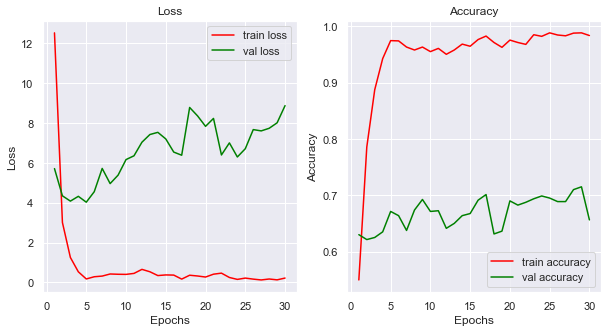

In [139]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

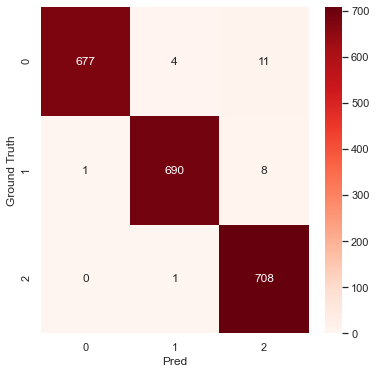

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='dark')
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [141]:
data = []
classList = []

for i in f:
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    img = cv2.imread(thePath)
    array = tf.keras.preprocessing.image.img_to_array(img)
    data.append(array)

data = np.array(data)
classList = np.array(classList)
print(data.shape)

(3000, 100, 100, 3)


In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(2100, 100, 100, 3)
(900, 100, 100, 3)
(800, 3)


In [143]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 248)               7440248   
_________________________________________________________________
dense_29 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 195       
Total params: 7,480,571
Trainable params: 7,480,571
Non-trainable params: 0
_________________________________________________________________


In [144]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 2s 11ms/step - loss: 28.6663 - accuracy: 0.4858 - val_loss: 12.7975 - val_accuracy: 0.6187
Epoch 2/30
66/66 [==============================] - 0s 6ms/step - loss: 8.0560 - accuracy: 0.7672 - val_loss: 10.6336 - val_accuracy: 0.6475
Epoch 3/30
66/66 [==============================] - 0s 6ms/step - loss: 2.7574 - accuracy: 0.8850 - val_loss: 11.4419 - val_accuracy: 0.6525
Epoch 4/30
66/66 [==============================] - 0s 6ms/step - loss: 1.9157 - accuracy: 0.9106 - val_loss: 11.5177 - val_accuracy: 0.6675
Epoch 5/30
66/66 [==============================] - 1s 8ms/step - loss: 1.6349 - accuracy: 0.9317 - val_loss: 11.6843 - val_accuracy: 0.6812
Epoch 6/30
66/66 [==============================] - 0s 7ms/step - loss: 1.1573 - accuracy: 0.9515 - val_loss: 11.5009 - val_accuracy: 0.6825
Epoch 7/30
66/66 [==============================] - 1s 8ms/step - loss: 0.8075 - accuracy: 0.9634 - val_loss: 13.2089 - val_accuracy: 0.7013
Epoch 8/30


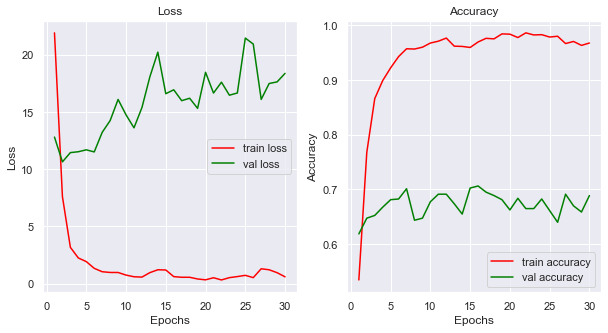

In [145]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [146]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)

4/4 [==============================] - 0s 3ms/step - loss: 19.5845 - accuracy: 0.6900


[19.584524154663086, 0.6899999976158142]

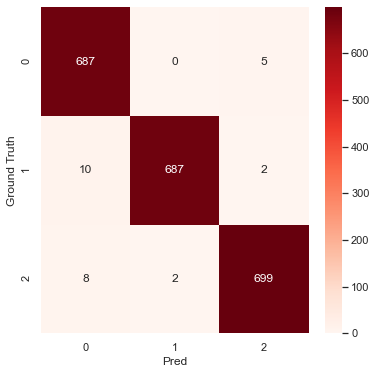

In [147]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [148]:
from keras.layers import Dropout

In [149]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 248)               7440248   
_________________________________________________________________
dropout_4 (Dropout)          (None, 248)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               31872     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                

4/4 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.7100


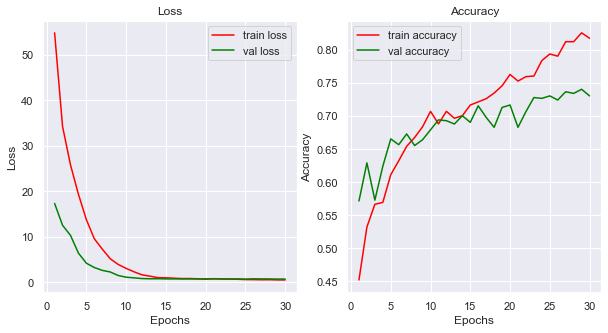

In [150]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

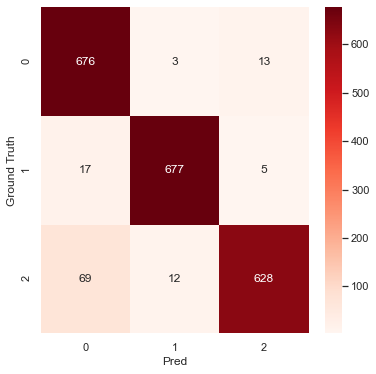

In [151]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

In [153]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(len(Y_test[1]), activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

In [154]:
histSecond = modelSecond.fit(
    X_train, Y_train, 
    epochs = EPOCHS, batch_size=64,
    # verbose=0,
    validation_data=(X_test, Y_test)
    )


Epoch 1/30
33/33 [==============================] - 3s 59ms/step - loss: 14.1395 - accuracy: 0.4381 - val_loss: 1.0924 - val_accuracy: 0.4112
Epoch 2/30
33/33 [==============================] - 2s 56ms/step - loss: 0.9658 - accuracy: 0.5938 - val_loss: 0.8954 - val_accuracy: 0.5362
Epoch 3/30
33/33 [==============================] - 2s 57ms/step - loss: 0.6970 - accuracy: 0.7024 - val_loss: 0.7756 - val_accuracy: 0.6350
Epoch 4/30
33/33 [==============================] - 2s 57ms/step - loss: 0.5254 - accuracy: 0.7900 - val_loss: 0.7194 - val_accuracy: 0.6637
Epoch 5/30
33/33 [==============================] - 2s 57ms/step - loss: 0.4566 - accuracy: 0.8195 - val_loss: 0.7077 - val_accuracy: 0.6900
Epoch 6/30
33/33 [==============================] - 2s 56ms/step - loss: 0.3800 - accuracy: 0.8452 - val_loss: 0.7098 - val_accuracy: 0.7050
Epoch 7/30
33/33 [==============================] - 2s 56ms/step - loss: 0.3337 - accuracy: 0.8690 - val_loss: 0.7088 - val_accuracy: 0.7200
Epoch 8/30
3

4/4 [==============================] - 0s 8ms/step - loss: 0.9102 - accuracy: 0.8100


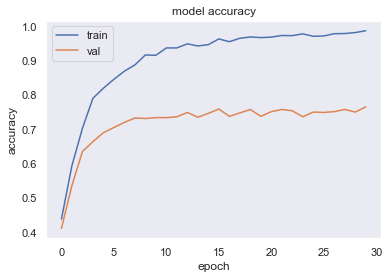

In [155]:
modelSecond.evaluate(X_train, Y_train)
modelSecond.evaluate(X_test, Y_test)
modelSecond.evaluate(X_Val, Y_Val)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

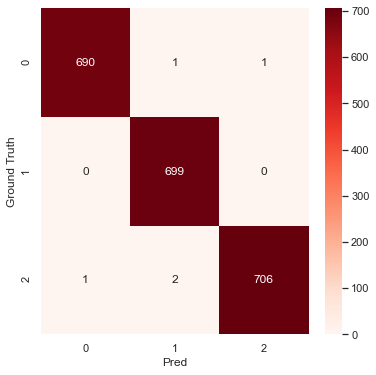

In [156]:
predY = modelSecond.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

## 5 Testing models

In [157]:
from os import walk
import numpy as np

path = 'data/imgTest/'
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

print (f)  

['circle_01.jpg', 'circle_02.jpg', 'circle_03.jpg', 'savedImage.jpg']


In [158]:
data = []
classList = []

for i in f:
    thePath = path + i
    img = cv2.imread(thePath)
    # array = tf.keras.preprocessing.image.img_to_array(img)
    print(array.shape)
    data.append(array)

data = np.array(data)
# print(data.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


In [164]:
results = modelSecond.predict(data)
print(results)

resultsss = model.predict(data)
print(results)

[[0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]]
[[0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]
 [0.00128237 0.99600524 0.00271248]]


In [165]:
for result in results:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

for result in resultsss:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

Rectangle 0.99600524
Rectangle 0.99600524
Rectangle 0.99600524
Rectangle 0.99600524
Rectangle 0.4130989
Rectangle 0.4130989
Rectangle 0.4130989
Rectangle 0.4130989


In [166]:
def getDrawing(type):
    offset = 5
    theWidth = width - offset
    theHeight = height - offset
    canvas = np.zeros(( width, height, 3), np.uint8)
    x = rnd.randrange(0, theHeight) + offset
    y = rnd.randrange(0, theHeight) + offset

    if type == 'cir':
        r = rnd.randrange(5, (int(theWidth * 0.5) + int(theHeight * 0.5)) * 0.5 )
        if (x - r < 0):
            r = x
        if (y - r < 0):
            r = y

        if (x + r > theWidth):
            r = theWidth - x
        if (y + r > theHeight):
            r = theHeight - y

        img = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
        return img

    elif type == 'rect':
        rectWidth = rnd.randrange(0, theWidth)
        rectHeight = rnd.randrange(0, theHeight)
        if (x + rectWidth > theWidth):
            rectWidth = theWidth - x
        if (y + rectHeight > theHeight):
            rectHeight = theHeight - y
        img = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        return img

    elif type == 'line':
        x1 = rnd.randrange(0, theWidth)
        y1 = rnd.randrange(0, theHeight)
        # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        img = cv2.line(canvas, (x, y), (x1, y1), (255, 255 ,255), 2 )
        return img
def img2array(img):
    return tf.keras.preprocessing.image.img_to_array(img)

shape (100, 100, 3)
[[0.7547776  0.24405244 0.00116995]]
Circle 75.47776103019714
[[75 24  0]]


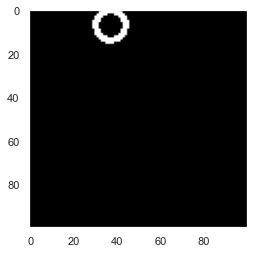

In [167]:
cir = getDrawing('cir')
plt.imshow(cir)

array = img2array(cir)
print('shape', array.shape)

result = modelSecond.predict(np.array([array]))
print(result)
index = np.argmax(result)

print(CLASS_INDEX[index], result[0][index] * 100)
print((result * 100).astype(int))

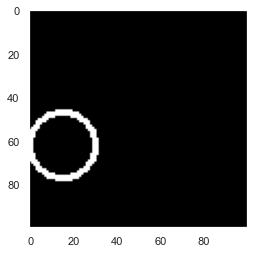

[[9.9857461e-01 1.0719656e-03 3.5339562e-04]]
Circle 99.85746145248413
[[99  0  0]]


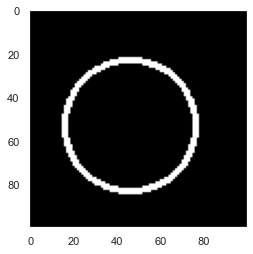

[[9.6692353e-01 3.3076458e-02 4.3466231e-14]]
Circle 96.69235348701477
[[96  3  0]]


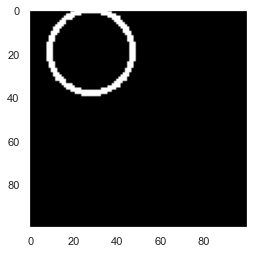

[[6.6936098e-02 9.3306321e-01 6.5513154e-07]]
Rectangle 93.30632090568542
[[ 6 93  0]]


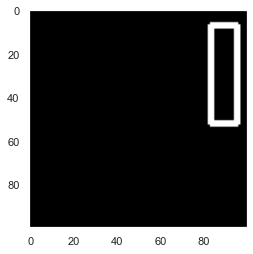

[[6.2850572e-11 3.5993408e-14 1.0000000e+00]]
Line 100.0
[[  0   0 100]]


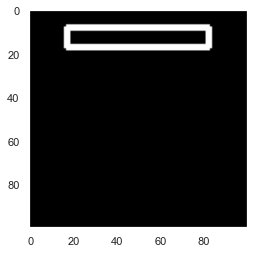

[[3.4686874e-03 6.0068949e-08 9.9653131e-01]]
Line 99.65313076972961
[[ 0  0 99]]


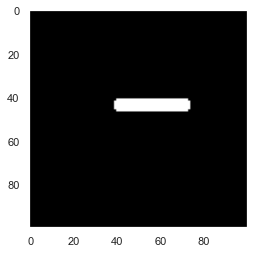

[[0.00077871 0.7655698  0.23365143]]
Rectangle 76.5569806098938
[[ 0 76 23]]


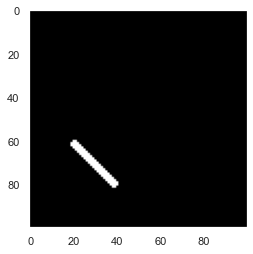

[[9.0601045e-04 9.9906582e-01 2.8227792e-05]]
Rectangle 99.90658164024353
[[ 0 99  0]]


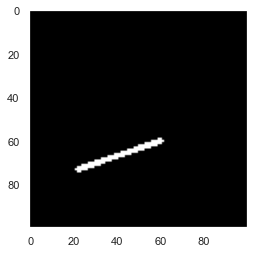

[[4.3971185e-04 9.9954957e-01 1.0742398e-05]]
Rectangle 99.95495676994324
[[ 0 99  0]]


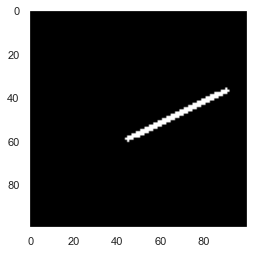

[[8.040660e-03 9.919592e-01 7.302443e-08]]
Rectangle 99.19592142105103
[[ 0 99  0]]


In [168]:
def getPrediction(typeShape):
    cir = getDrawing(typeShape)
    plt.imshow(cir)
    plt.show()

    array = img2array(cir)
    # print('shape', array.shape)

    result = modelSecond.predict(np.array([array]))
    print(result)
    index = np.argmax(result)

    print(CLASS_INDEX[index], result[0][index] * 100)
    print((result * 100).astype(int))

typeShapes = ['cir', 'cir', 'cir', 'rect', 'rect', 'rect', 'line', 'line', 'line']
for t in typeShapes:
    getPrediction(t)
